In [467]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def display_image_in_actual_size(img):
    
    dpi = 80
    #im_data = plt.imread(im_path)
    height, width, *_ = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

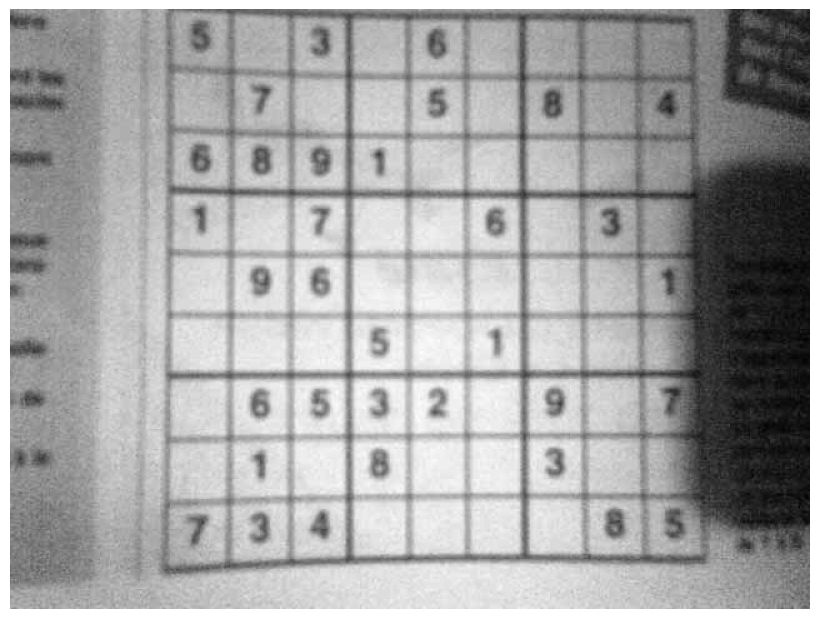

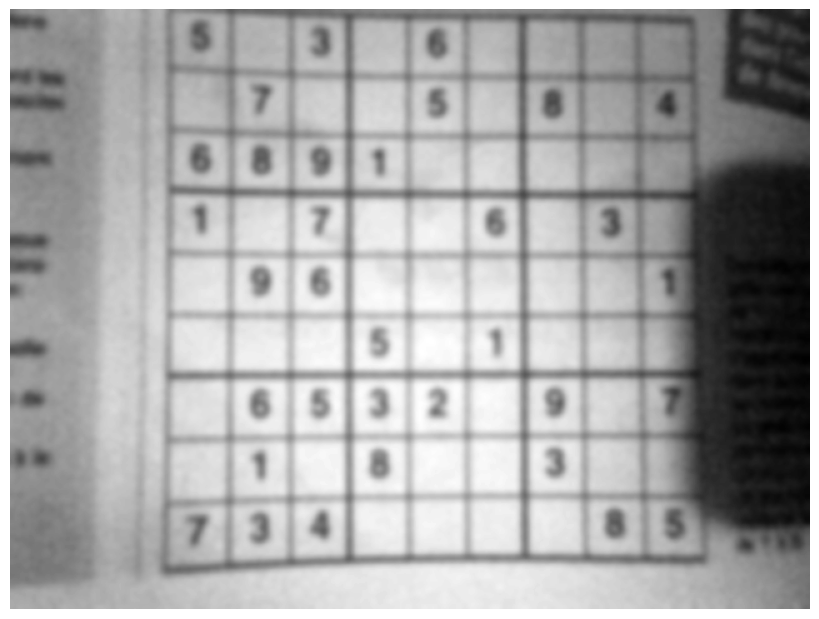

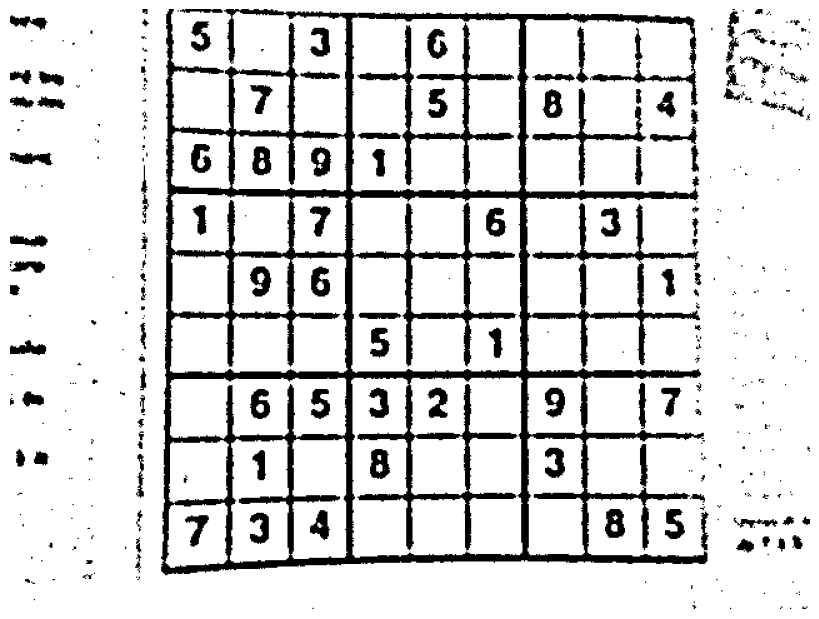

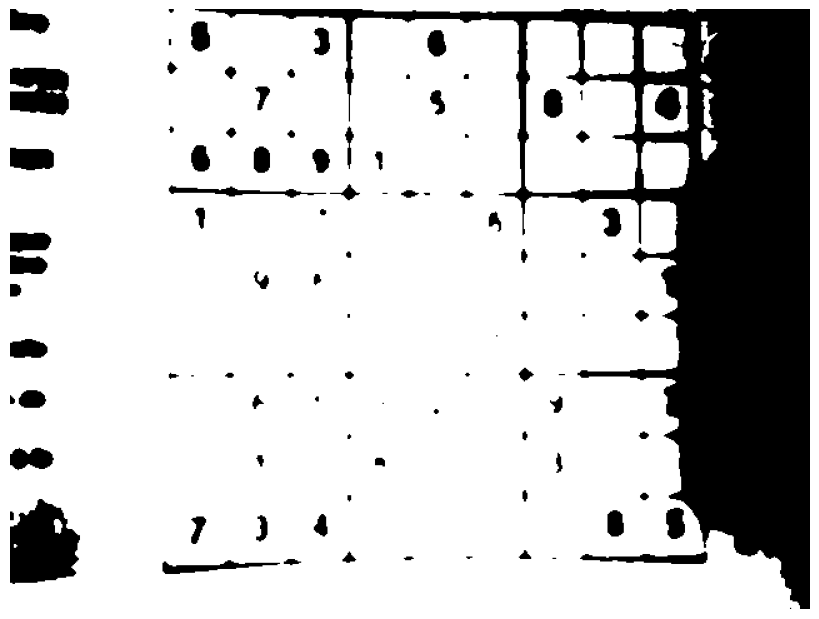

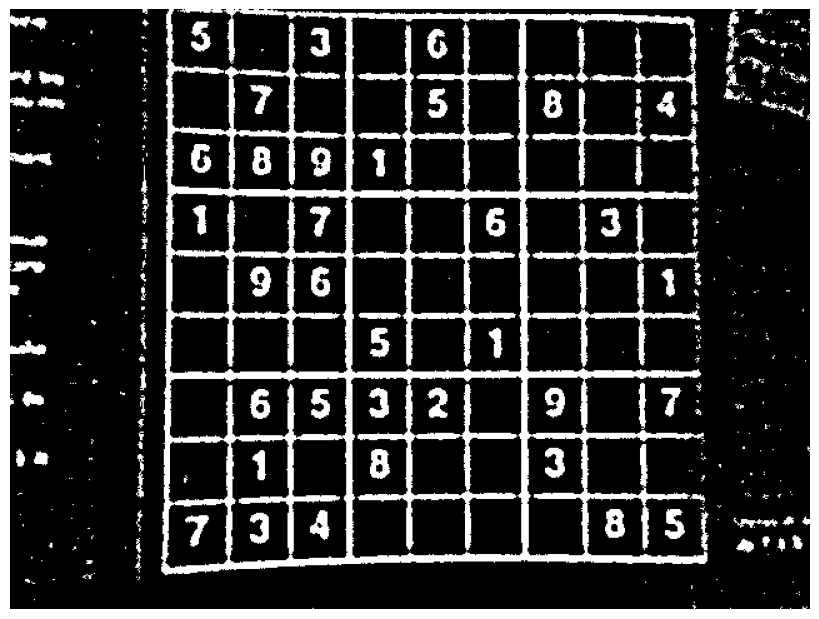

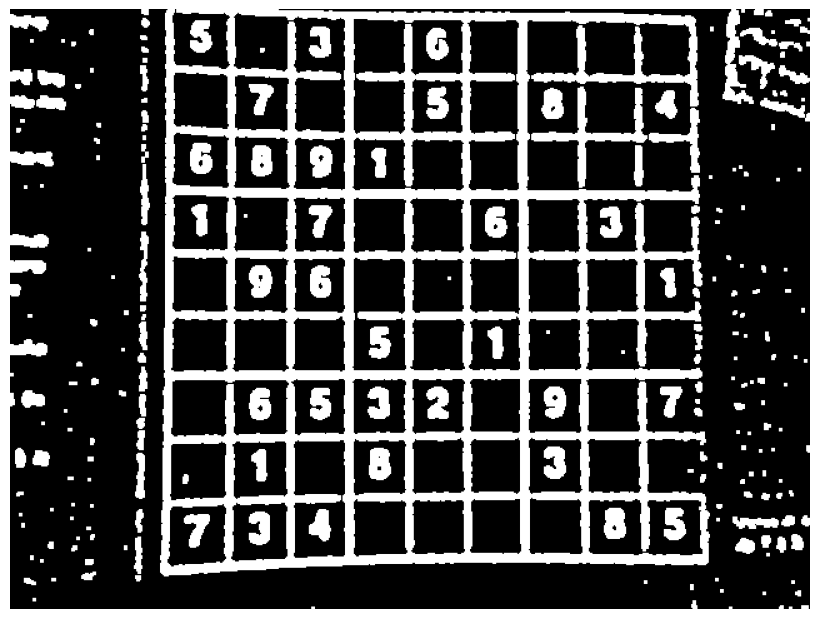

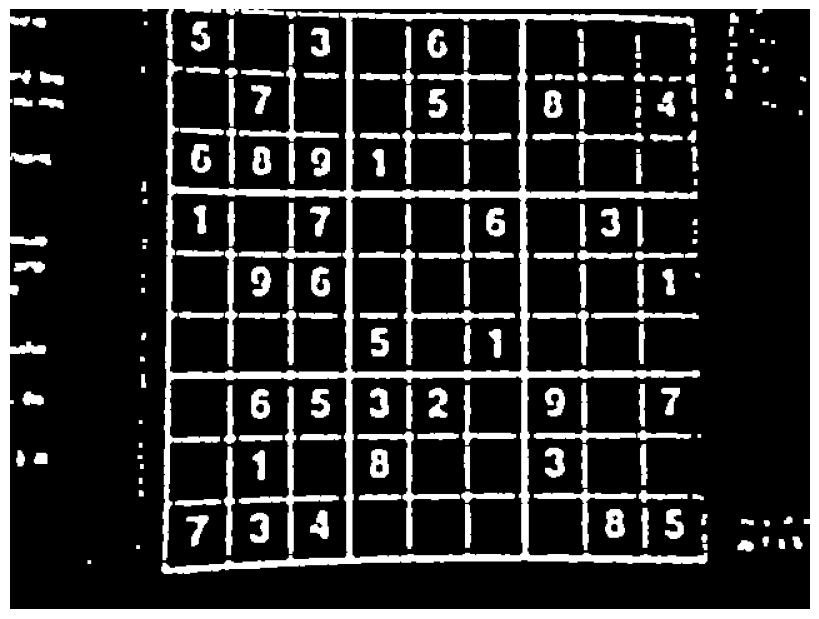

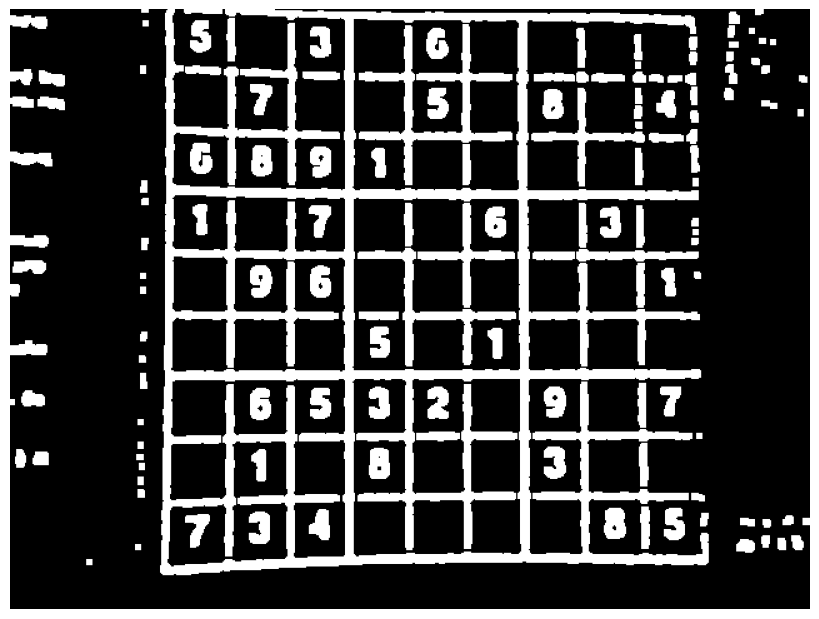

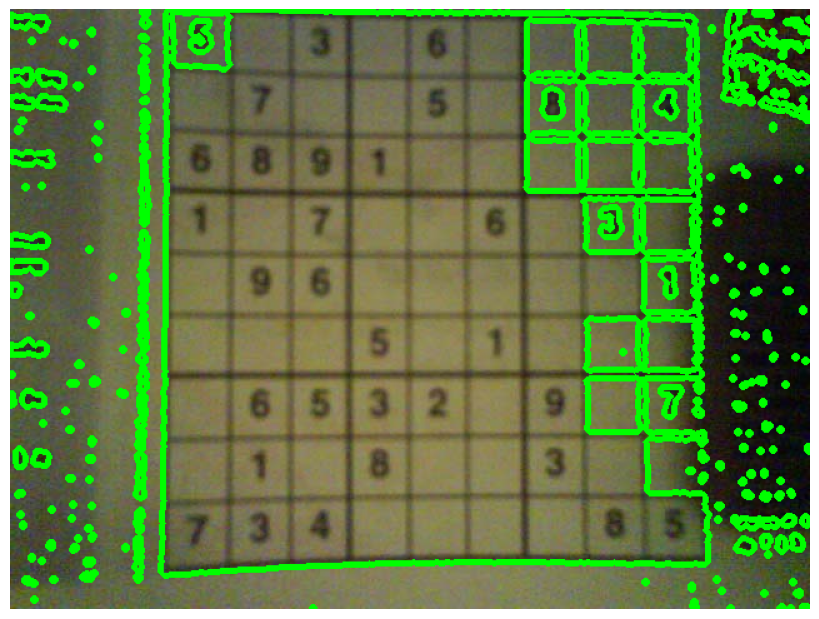

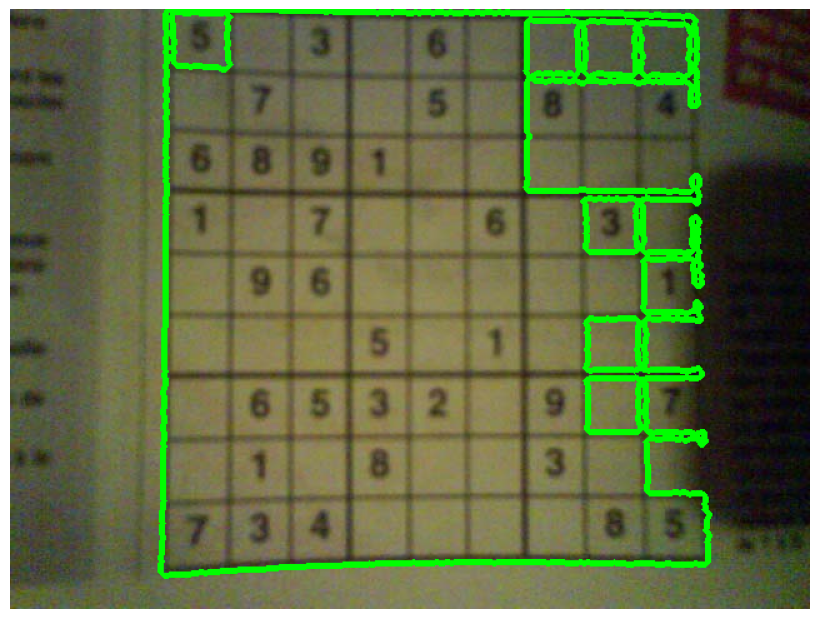

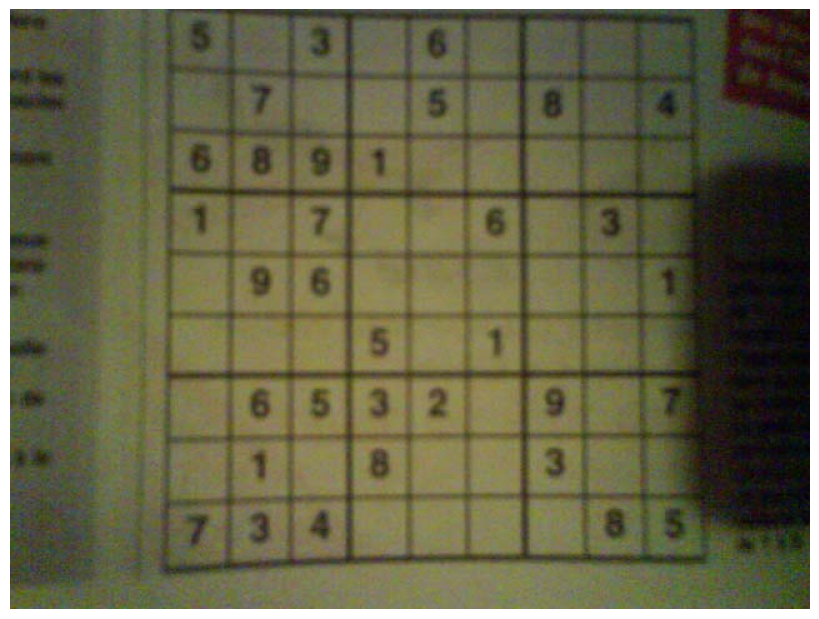

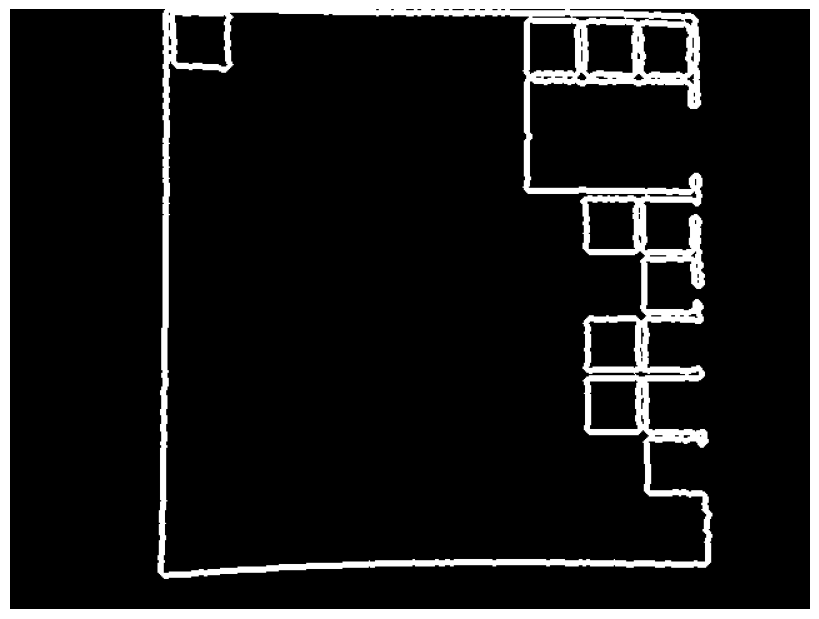

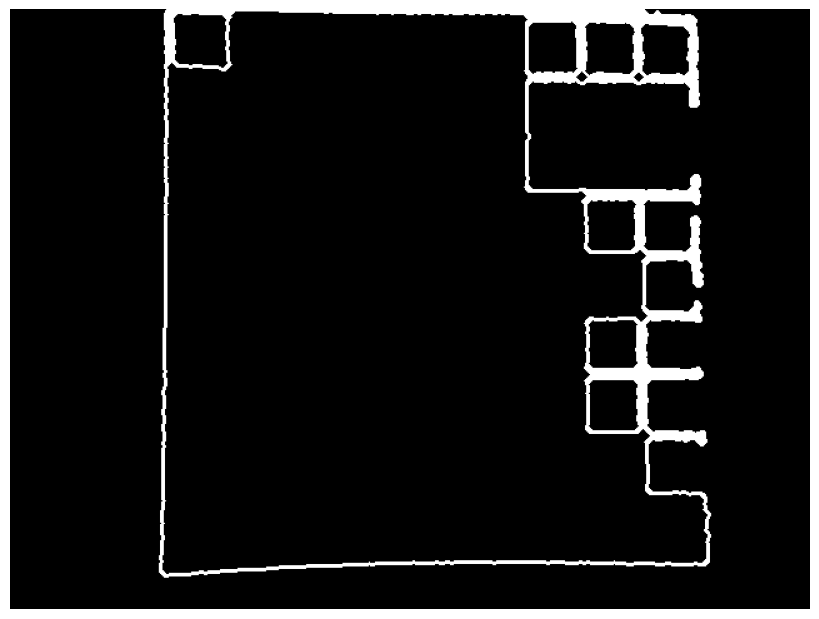

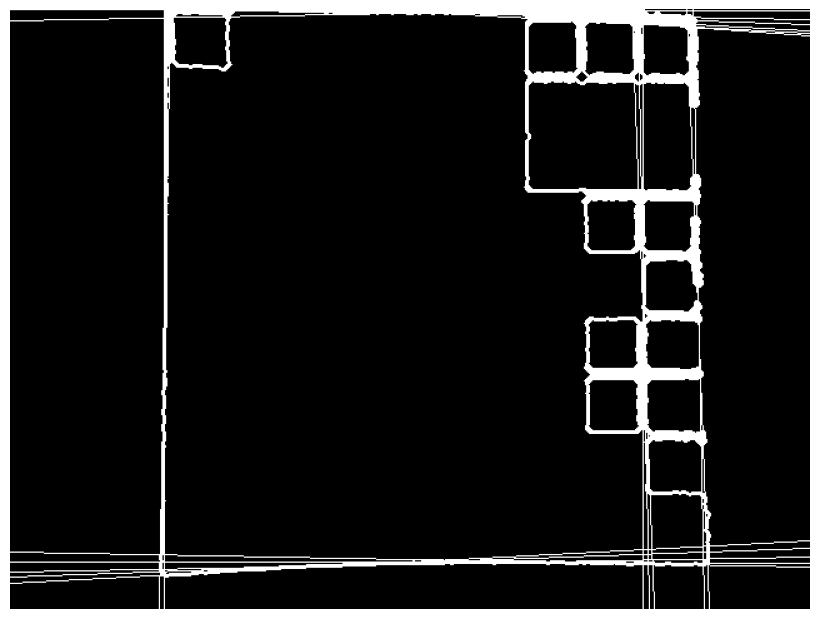

In [468]:
img = cv2.imread('v2_train/image17.jpg')
#img = cv2.imread('testimg.jpg')
heightImg = img.shape[0]
widthImg = img.shape[1]
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
#img = cv2.imread('testimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
# div = np.float32(gray)/(close)
# res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))

blur = cv2.GaussianBlur(gray, (11,11), 0)
#median = cv2.medianBlur(gray,3)
#blur = cv2.bilateralFilter(gray,9,75,75)


thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)

_, otsuThresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

notthresh = cv2.bitwise_not(thresh)

#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], np.uint8)
notthreshCopy = notthresh.copy()
dilated2 = cv2.dilate(notthreshCopy, kernel, iterations=1)
opening = cv2.morphologyEx(notthresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(opening, kernel, iterations=1)

#flooded = cv2.floodFill(dilated, None, (0,0), 128)

imgContours = img.copy() 
imgBigContour = img.copy()
imgBigContourApprox = img.copy()
imgJustBigContour = np.zeros((heightImg, widthImg, 1), np.uint8)
contours, hierarchy = cv2.findContours(dilated2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgContours = cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 3)

contoursSorted = sorted(contours, key=cv2.contourArea, reverse=True)
largestContour = contoursSorted[0]
imgBigContour = cv2.drawContours(imgBigContour, [largestContour], -1, (0, 255, 0), 3)
imgJustBigContour = cv2.drawContours(imgJustBigContour, [largestContour], -1, 255, 3)

#epsilon = 0.001*cv2.arcLength(largestContour,True)
#approx = cv2.approxPolyDP(largestContour,epsilon,True)

#x,y,w,h = cv2.boundingRect(largestContour)
#imgBigContourApprox = cv2.rectangle(imgBigContourApprox,(x,y),(x+w,y+h),(0,255,0),2)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
grid = cv2.dilate(imgJustBigContour, kernel, iterations=2)
grid = cv2.erode(grid, kernel, iterations=3)

lines = cv2.HoughLines(grid, 1, np.pi / 180, 200)

gridcopy = grid.copy()
height, width = np.shape(grid)
if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopy, pt1, pt2, 255)


#imgBigContourApprox = cv2.drawContours(imgBigContourApprox, [approx], -1, (0, 255, 0), 3)
# if len(approx) == 4:
#     print("good")
# else:
#     print("Cannot find grid")


display_image_in_actual_size(gray)
#display_image_in_actual_size(res)
display_image_in_actual_size(blur)
display_image_in_actual_size(thresh)
display_image_in_actual_size(otsuThresh)
display_image_in_actual_size(notthresh)
display_image_in_actual_size(dilated2)
display_image_in_actual_size(opening)
display_image_in_actual_size(dilated)
display_image_in_actual_size(imgContours)
display_image_in_actual_size(imgBigContour)
display_image_in_actual_size(imgBigContourApprox)
display_image_in_actual_size(imgJustBigContour)
display_image_in_actual_size(grid)
display_image_in_actual_size(gridcopy)

#display_image_in_actual_size(gray2)
#f, axarr = plt.subplots(4,1)
#axarr[0].imshow(gray, 800, cmap='gray')
#axarr[1].imshow(blur, cmap='gray')
#axarr[2].imshow(thresh, cmap='gray')
#axarr[3].imshow(otsuThresh, cmap='gray')
#for ax in axarr:
#    ax.axis('off')
#plt.xticks([]),plt.yticks([])